In [1]:
#### import python libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


#### setting paths

In [3]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

#### image dimensions

In [4]:
img_width = 180  
img_height =180 

#### loading the training dataset

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3581 files belonging to 36 classes.


#### Extracting the categories

In [6]:
data_cat = data_train.class_names

#### Display the categories

In [7]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

#### Loading the validation dataset

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


#### Loading the test dataset

In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


#### Visualizing the training data

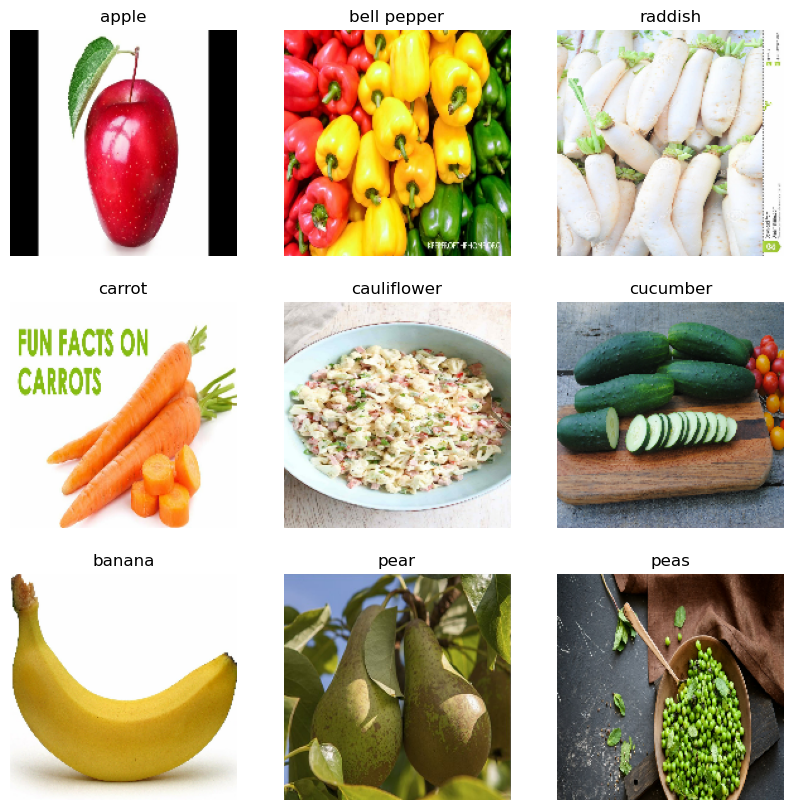

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

#### Import sequencial--> its defines linear stack of layers

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#### Define a CNN model

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

#### compile the model

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#### Training the model

In [15]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 28s 222ms/step - accuracy: 0.0728 - loss: 3.7670 - val_accuracy: 0.3191 - val_loss: 2.4579
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 29s 258ms/step - accuracy: 0.2597 - loss: 2.6330 - val_accuracy: 0.5328 - val_loss: 1.5792
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 32s 281ms/step - accuracy: 0.4200 - loss: 2.0474 - val_accuracy: 0.7236 - val_loss: 1.0493
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 32s 281ms/step - accuracy: 0.6276 - loss: 1.3391 - val_accuracy: 0.8974 - val_loss: 0.4969
Epoch 5/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 30s 268ms/step - accuracy: 0.8013 - loss: 0.7217 - val_accuracy: 0.9288 - val_loss: 0.3020
Epoch 6/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 238ms/step - accuracy: 0.8877 - loss: 0.4506 - val_accuracy: 0.9630 - val_loss: 0.1709
Epoch 7/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 226ms/step - accuracy: 0.9288 - loss: 0.2755 - val_accuracy: 0.9715 - val_loss: 0.3346
Epoch 8/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 241ms/step - accuracy: 0.9424 - loss: 0

#### PLotting training history

Text(0.5, 1.0, 'Loss')

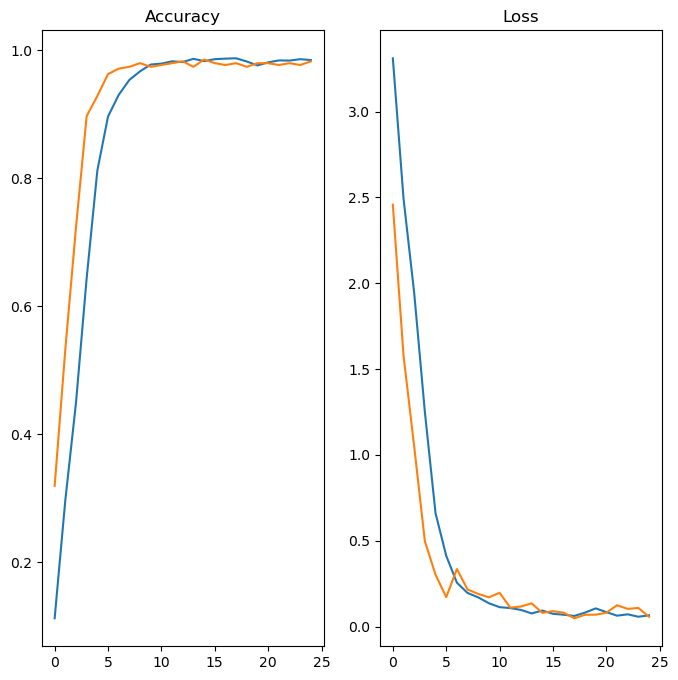

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

#### Making prediction on a single image

In [17]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

FileNotFoundError: [Errno 2] No such file or directory: 'Apple.jpg'

#### Generates predictions

In [ ]:
predict = model.predict(img_bat)

#### Converts raw output into probabilities of class

In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

In [ ]:
model.save('Image_classify.keras')